###  Gross Domestic Product

#### Proses Data Cleaning GDP

In [30]:
import pandas as pd
from wb_functions.wb_functions import specific_countries_time_series

In [31]:
gdp_constant = pd.read_csv("data/world-bank/gdp-constant-US$2015.csv", skiprows = 3)

In [32]:
ASEAN_5 = ["Indonesia", "Malaysia", "Singapore", "Thailand","Philippines"]

In [33]:
gdp_constant = specific_countries_time_series(gdp_constant, ASEAN_5)

In [34]:
gdp_constant.head()

Country Name,Indonesia,Malaysia,Philippines,Singapore,Thailand
1960,5.277761e+10,1.007504e+10,3.134444e+10,5.942828e+09,1.590875e+10
1961,5.580738e+10,1.084054e+10,3.312966e+10,6.426389e+09,1.676180e+10
1962,5.683534e+10,1.153661e+10,3.473522e+10,6.911842e+09,1.802802e+10
1963,5.556392e+10,1.238326e+10,3.717233e+10,7.605834e+09,1.947024e+10
1964,5.752516e+10,1.304688e+10,3.843712e+10,7.369799e+09,2.080025e+10


In [24]:
gdp_constant.to_csv("cleaned-data/constant-gdp-2015US$.csv")

## Exploratory Data Analysis

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
gdp = pd.read_csv("cleaned-data/constant-gdp-2015US$.csv", index_col = 'Unnamed: 0')

GDP konstan dalam Miliar 2015US$

In [38]:
gdp_billion = gdp/1000000000

In [39]:
gdp_billion.describe()

,Indonesia,Malaysia,Philippines,Singapore,Thailand
count,61.000000,61.000000,61.000000,61.000000,61.000000
mean,354.395324,117.739035,136.910631,113.142477,176.378182
std,289.575343,105.763931,95.485567,108.471487,140.975669
min,52.777608,10.075038,31.344442,5.942828,15.908745
25%,108.051164,27.721992,66.866840,22.551426,46.091900
50%,269.915110,74.627439,106.641788,70.864053,144.045063
75%,497.631792,186.898482,179.365920,177.993672,288.645290
max,1049.318967,364.693381,396.224788,348.909587,460.750264


Indonesia menjadi negara dengan kue ekonomi terbesar di antara negara ASEAN-5 lainnya. Dengan nilai GDP tertinggi sebebsar US$ 1.049,31 Miliar.

In [40]:
# Indonesia vs The rest ASEAN-5
rest = ["Malaysia", "Singapore", "Thailand", "Philippines"]

for i in rest:
    print(f'{i} = {round(gdp_billion["Indonesia"].max()/gdp_billion[i].max(), 2)}x Indonesian GDP')

Malaysia = 2.88x Indonesian GDP
Singapore = 3.01x Indonesian GDP
Thailand = 2.28x Indonesian GDP
Philippines = 2.65x Indonesian GDP


## Visualisasi Data

### GDP dalam level

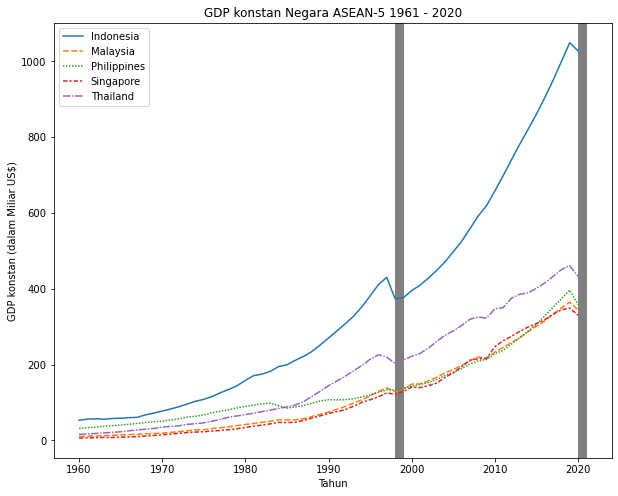

In [41]:
fig, ax = plt.subplots(figsize=(10,8))

sns.lineplot(data=gdp_billion)

ax.set_ylabel("GDP konstan (dalam Miliar US$)")
ax.set_xlabel("Tahun")
ax.legend(gdp_billion.columns)

#Krisis ekonomi Asia 1998, pandemi Covid-19
ax.axvspan(xmin = 1998, xmax = 1998+1, color='grey')
ax.axvspan(xmin = 2020, xmax = 2020+1, color='grey')

ax.set_title("GDP konstan Negara ASEAN-5 1961 - 2020")

fig.savefig('pictures/constant-gdp.png')
!

GDP negara ASEAN-5 mengalami peningkatan sejak tahun 1961. Tampak terjadi pergerakan bersama pada masa-masa tertentu. Semisal krisis ekonomi asia pada tahun 1998, setiap negara ASEAN-5 mengalami penurunan nilai GDP. Hal serupa terjadi pada tahun 2020, yaitu krisis ekonomi akibat pandemi Covid-19

### Pertumbuhan Ekonomi

In [42]:
growth = gdp_billion.pct_change()*100

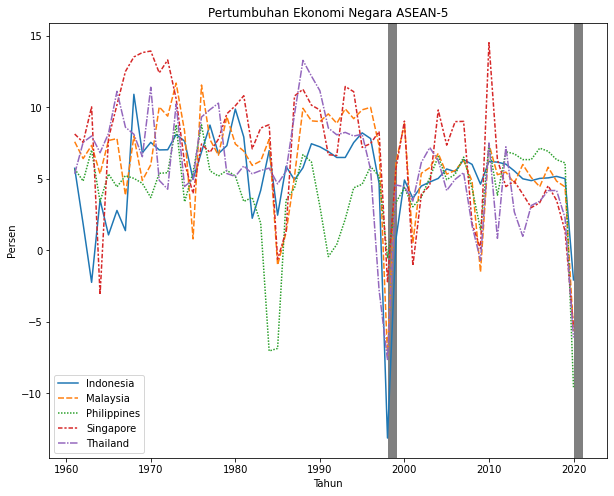

In [43]:
fig, ax = plt.subplots(figsize=(10,8))

sns.lineplot(data=growth)

ax.set_ylabel("Persen")
ax.set_xlabel("Tahun")
ax.legend(growth.columns)

#Krisis ekonomi Asia 1998, pandemi Covid-19
ax.axvspan(xmin = 1998, xmax = 1998+1, color='grey')
ax.axvspan(xmin = 2020, xmax = 2020+1, color='grey')

ax.set_title("Pertumbuhan Ekonomi Negara ASEAN-5")

fig.savefig('pictures/gdp-growth.png')
!

Selain dari dua krisis besar, Krisis ekonomi Asia 1998 dan Pandemi Covid-19, Terdapat beberapa momen di mana ekonomi beberapa negara tertentu mengalami krisis.

In [44]:
growth.describe()

,Indonesia,Malaysia,Philippines,Singapore,Thailand
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,5.131592,6.124539,4.200713,7.017688,5.732013
std,3.434743,3.620158,3.372412,4.457693,3.894371
min,-13.126725,-7.359415,-9.573030,-5.391021,-7.634035
25%,4.682127,5.166832,3.488565,4.341629,4.256277
50%,5.716609,6.359908,5.062535,7.512713,5.618073
75%,6.987645,8.453714,6.134874,10.124566,8.120804
max,10.915179,11.701082,8.782009,14.525639,13.288114


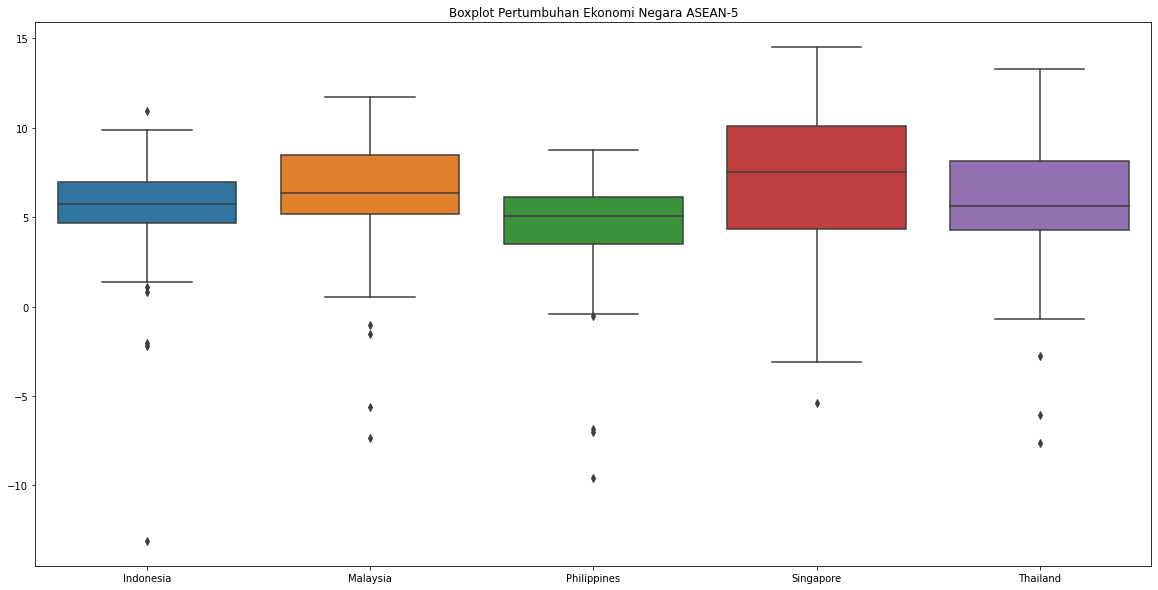

In [45]:
fig, ax = plt.subplots(figsize = (20, 10))


sns.boxplot(data=growth.dropna())
ax.set_xticklabels(growth.columns)
ax.set_title("Boxplot Pertumbuhan Ekonomi Negara ASEAN-5")

fig.savefig('pictures/growth-boxplot.png')
!

Penjelasan boxplot
* Titik-titik yang berada diluar ekor boxplot menunjukkan data *outlier*.
* Garis horizontal berwarna kuning menunjukkan nilai tengah
* sisi box atas menunjukkan kuartil 3
* sisi box bawah menunjukkan kuartil 1
* Ekor atas menunjukkan nilai maksimum kuartil, kuartil 3 + 1.5*(kuartil 3 - kuartil 1)
* Ekor atas menunjukkan nilai minimum kuartil, kuartil 1 - 1.5*(kuartil 3 - kuartil 1)

In [46]:
ASEAN_5 = ["Indonesia", "Malaysia", "Singapore", "Thailand", "Philippines"]

for i in ASEAN_5:
    print(f'Interquartile {i} : {growth[i].quantile(q = 0.75) - growth[i].quantile(q = 0.25) }')

Interquartile Indonesia : 2.3055182199148874
Interquartile Malaysia : 3.286881332793058
Interquartile Singapore : 5.782937206263851
Interquartile Thailand : 3.8645266707011627
Interquartile Philippines : 2.6463085920220957


* Indonesia menjadi negara yang mendapatkan pengalaman terburuk dari krisis ekonomi dengan *outlier* negatif yang paling jauh dibanding negara lainnya. Namun, fluktuasi pertumbuhan relatif lebih rendah.
* Singapura menjadi negara yang kebal terhadap krisis ekonomi sekaligus menjadi negara yang mengalami pertumbuhan yang relatif lebih fluktuatif.

**Indonesia**: Rentan tetapi stabil secara keseluruhan \
**Singapura**: Kebal tetapi tidak stabil secara keseluruhan

### Korelasi Pertumbuhan Ekonomi

In [47]:
corr = growth.corr()
low_mat = np.triu(corr)

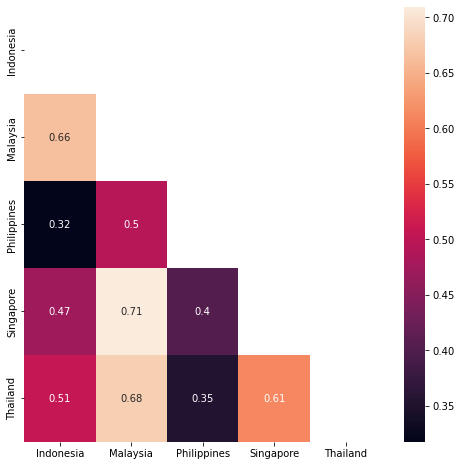

In [48]:
fig, ax = plt.subplots(figsize = (8, 8))

sns.heatmap(corr, annot=True, mask=low_mat)

fig.savefig('pictures/growth-heatmap.png')

Secara keseluruhan, negara ASEAN-5 mengalami korelasi positif. Artinya, terdapat hubungan yang kuat antara pertumbuhan ekonomi suatu negara dan negara lainnya.

* Korelasi tertinggi dialami oleh pasangan negara Malaysia-Singapura dengan nilai korelasi sebesar 0,71
* Korelasi terendah dialami oleh pasangan negara Indonesia-Filipina dengan nilai korelasi sebesar 0,32